In [1]:
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-g9vz3p36
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-g9vz3p36
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/f4/f0/21efef51304172736b823689aaf82f33dbc64f54e9b046b75f5212d5cee7/ftfy-6.2.0-py3-none-any.whl.metadata
  Using cached ftfy-6.2.0-py3-none-any.whl.metadata (7.3 kB)
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/07/17/5d92509b4dccacf9767d8607112c19667e15db2428014440bae4356b8aff/regex-2024.5.15-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached regex-2024.5.15-cp310-cp310-manylinux_2_17_x86_64.many

In [2]:
!pip install torch

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple


In [5]:
import torch
import clip
from PIL import Image

# Load the model and preprocess function
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load and preprocess the image
image = preprocess(Image.open("/home/jovyan/ai/image/robot.jpg")).unsqueeze(0).to(device)

# Define a list of text descriptions
texts = ["a photo of a robot", "a photo of a person", "a photo of a dog"]

# Tokenize the text descriptions
text_tokens = clip.tokenize(texts).to(device)

# Perform inference
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_tokens)

# Normalize the features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute the similarity between the image and text
similarity = (image_features @ text_features.T).squeeze()

# Print the similarity scores
for i, score in enumerate(similarity):
    print(f"Similarity with '{texts[i]}': {score.item()}")

# Determine the most similar text description
best_match = texts[similarity.argmax()]
print(f"The image is most similar to: '{best_match}'")


Similarity with 'a photo of a robot': 0.26025390625
Similarity with 'a photo of a person': 0.1959228515625
Similarity with 'a photo of a dog': 0.1676025390625
The image is most similar to: 'a photo of a robot'


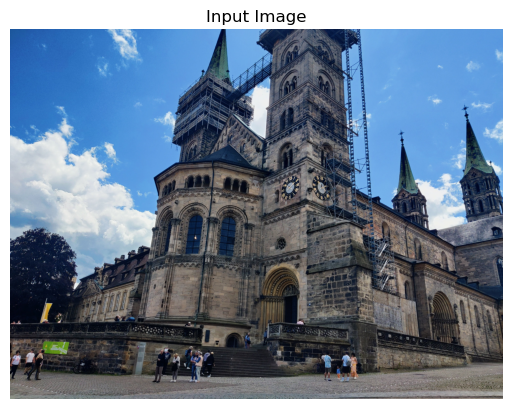

Similarity with 'a beautiful house': 0.2088623046875
Similarity with 'a castle': 0.2451171875
Similarity with 'a church': 0.25634765625
Similarity with 'a university': 0.2232666015625
Similarity with 'a Temples': 0.2252197265625
The image is most similar to: 'a church'


In [4]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# Load the model and preprocess function
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Load and preprocess the image
image_path = "/home/jovyan/ai/IMG_20240616_135109.jpg"
image = Image.open(image_path)
preprocessed_image = preprocess(image).unsqueeze(0).to(device)

# # Load and preprocess the image
# image = preprocess(Image.open("/home/jovyan/ai/image/robot.jpg")).unsqueeze(0).to(device)

# Define a list of text descriptions
texts = [
    "a beautiful house",
    "a castle",
    "a church",
    "a university",
    "a Temples",
]

# Tokenize the text descriptions
text_tokens = clip.tokenize(texts).to(device)

# Perform inference
with torch.no_grad():
    image_features = model.encode_image(preprocessed_image)
    text_features = model.encode_text(text_tokens)

# Normalize the features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Compute the similarity between the image and text
similarity = (image_features @ text_features.T).squeeze()

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()

# Print the similarity scores
for i, score in enumerate(similarity):
    print(f"Similarity with '{texts[i]}': {score.item()}")

# Determine the most similar text description
best_match = texts[similarity.argmax()]
print(f"The image is most similar to: '{best_match}'")
